In [23]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.interpolate import griddata

In [24]:
frictions = [1, 0.1, 0.01, 0.001, 0.0001]
spacings = [0.001, 0.0001, 0.00001]

In [25]:
results = []
folder = 'friction_and_spacing_results'
for json_file in os.listdir(folder):
    _, friction_idx, _, spacing_idx, rotation = json_file.split('.')[0].split('_')
    json_file = os.path.join(folder,json_file)
    with open(json_file, "r") as file:
        data = json.load(file)
    angular_error = sum(data.values()) / len(data.values())
    results.append([frictions[int(friction_idx)], spacings[int(spacing_idx)], rotation, angular_error])
results

[[0.01, 0.0001, "R'", 0.37526376469174794],
 [0.1, 0.001, 'U', 0.04551279569984423],
 [0.0001, 0.001, "U'", 0.8220938505674789],
 [0.0001, 1e-05, 'U', 0.006266004415257173],
 [0.1, 0.0001, "U'", 0.7961471679320211],
 [0.001, 0.0001, "F'", 0.7624913165155741],
 [0.01, 0.0001, 'R', 0.02162403211480635],
 [0.001, 1e-05, 'R', 0.02383183016312054],
 [0.0001, 1e-05, "R'", 0.3644010925247617],
 [0.001, 0.001, 'F', 0.06272297449202296],
 [0.01, 0.0001, 'F', 0.018562498067672226],
 [1, 1e-05, "F'", 0.145933459802603],
 [0.01, 1e-05, "U'", 0.7897396005559253],
 [0.1, 1e-05, "R'", 0.8666675941873981],
 [0.001, 1e-05, 'F', 0.00767964720616079],
 [0.001, 0.001, 'R', 0.06824603480655839],
 [0.01, 0.001, "R'", 0.4038779181684631],
 [1, 0.0001, 'U', 0.011541282086355357],
 [0.0001, 0.0001, "U'", 0.7930873212853903],
 [0.001, 0.001, "F'", 0.7430349518034733],
 [0.0001, 0.001, 'U', 0.05047781826163546],
 [0.1, 0.001, "U'", 0.8031905529699465],
 [0.1, 1e-05, 'U', 0.0021438373243434917],
 [1, 0.001, "F'",

In [26]:
sorted(results, key = lambda x : x[3])

[[0.1, 1e-05, 'U', 0.0021438373243434917],
 [0.1, 1e-05, 'F', 0.0023776543729134795],
 [1, 1e-05, 'U', 0.0031579505807536544],
 [0.01, 1e-05, 'U', 0.005826272894369167],
 [0.001, 1e-05, 'U', 0.006113503346257624],
 [0.0001, 1e-05, 'U', 0.006266004415257173],
 [0.001, 1e-05, 'F', 0.00767964720616079],
 [0.0001, 1e-05, 'F', 0.007954059641472081],
 [0.1, 0.0001, 'U', 0.008869248256067759],
 [0.01, 1e-05, 'F', 0.01034575091291144],
 [1, 0.0001, 'U', 0.011541282086355357],
 [0.1, 0.0001, 'F', 0.011714340707839721],
 [0.01, 0.0001, 'U', 0.012392909366317949],
 [0.001, 0.0001, 'U', 0.01272426855453735],
 [0.0001, 0.0001, 'U', 0.012724636328814425],
 [0.1, 1e-05, "F'", 0.014010965836497316],
 [1, 0.0001, "U'", 0.0152789300139377],
 [1, 0.0001, "F'", 0.017037482969201354],
 [0.0001, 0.0001, 'F', 0.018275812349417893],
 [0.001, 0.0001, 'F', 0.018316416920312766],
 [0.01, 0.0001, 'F', 0.018562498067672226],
 [0.1, 1e-05, 'R', 0.020658197914832883],
 [0.01, 0.0001, 'R', 0.02162403211480635],
 [0.0

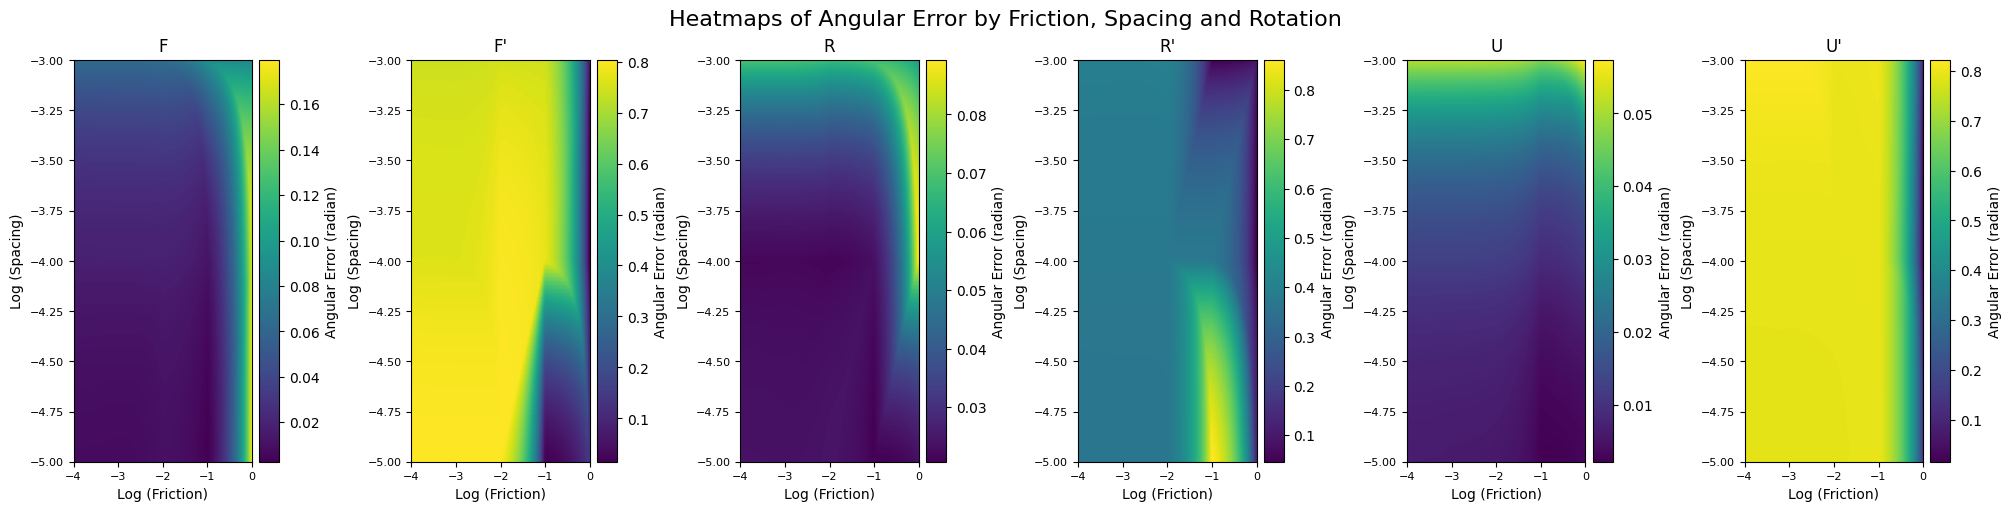

In [27]:
# Data (Replace `results` with your actual data)
data = results

# Extract components
friction = np.array([entry[0] for entry in data])
spacing = np.array([entry[1] for entry in data])
rotations = np.array([entry[2] for entry in data])
error = np.array([entry[3] for entry in data])

# Unique rotations
unique_rotations = np.unique(rotations)

# Set up the grid for heatmaps
friction_grid = np.logspace(np.log10(min(friction)), np.log10(max(friction)), 100)
spacing_grid = np.logspace(np.log10(min(spacing)), np.log10(max(spacing)), 100)
grid_x, grid_y = np.meshgrid(friction_grid, spacing_grid)

# Create heatmaps for each rotation
fig, axes = plt.subplots(1, len(unique_rotations), figsize=(20, 5), constrained_layout=True)
for i, rotation in enumerate(unique_rotations):
    # Mask data for the current rotation
    mask = rotations == rotation
    grid_z = griddata(
        (friction[mask], spacing[mask]), error[mask],
        (grid_x, grid_y), method='linear'
    )

    # Plot heatmap
    ax = axes[i]
    heatmap = ax.imshow(
        grid_z,
        extent=[
            np.log10(min(friction)), np.log10(max(friction)),
            np.log10(min(spacing)), np.log10(max(spacing))
        ],
        origin='lower',
        aspect='auto',
        cmap='viridis'
    )

    # Titles and labels
    ax.set_title(f'{rotation}', fontsize=12)
    ax.set_xlabel('Log (Friction)', fontsize=10)
    ax.set_ylabel('Log (Spacing)', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)

    # Add color bar
    cbar = plt.colorbar(heatmap, ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label('Angular Error (radian)', fontsize=10)

# Overall plot title
fig.suptitle('Heatmaps of Angular Error by Friction, Spacing and Rotation', fontsize=16)
# plt.savefig('error_heatmaps.png', dpi=300)
plt.show()


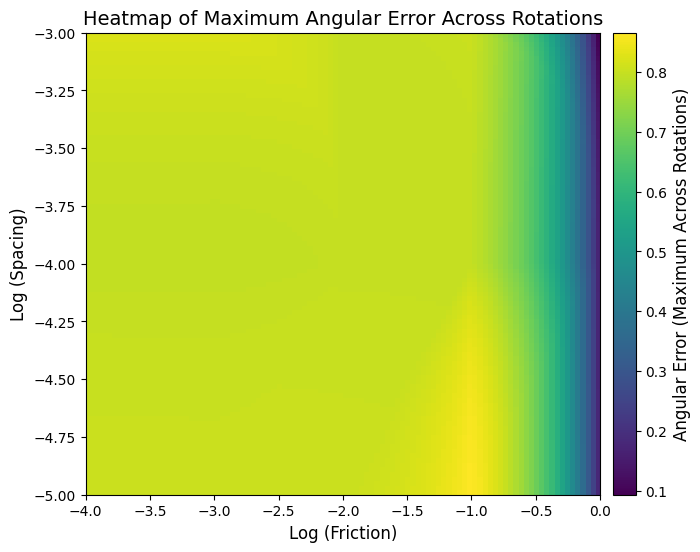

In [28]:
# Data (Replace `results` with your actual data)
data = results

# Extract components
friction = np.array([entry[0] for entry in data])
spacing = np.array([entry[1] for entry in data])
rotations = np.array([entry[2] for entry in data])
error = np.array([entry[3] for entry in data])

# Aggregate maximum error for each (friction, spacing)
# Group errors by unique (friction, spacing) pairs
unique_pairs = list(set(zip(friction, spacing)))
max_error_per_pair = {
    pair: max(error[(friction == pair[0]) & (spacing == pair[1])])
    for pair in unique_pairs
}

# Prepare data for interpolation
friction_unique = np.array([pair[0] for pair in unique_pairs])
spacing_unique = np.array([pair[1] for pair in unique_pairs])
error_max = np.array([max_error_per_pair[pair] for pair in unique_pairs])

# Set up the grid for heatmap
friction_grid = np.logspace(np.log10(min(friction)), np.log10(max(friction)), 100)
spacing_grid = np.logspace(np.log10(min(spacing)), np.log10(max(spacing)), 100)
grid_x, grid_y = np.meshgrid(friction_grid, spacing_grid)

# Interpolate the maximum error for the grid
grid_z = griddata(
    (friction_unique, spacing_unique), error_max,
    (grid_x, grid_y), method='linear'
)

# Create the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(
    grid_z,
    extent=[
        np.log10(min(friction)), np.log10(max(friction)),
        np.log10(min(spacing)), np.log10(max(spacing))
    ],
    origin='lower',
    aspect='auto',
    cmap='viridis'
)

# Add title and axis labels
ax.set_title('Heatmap of Maximum Angular Error Across Rotations', fontsize=14)
ax.set_xlabel('Log (Friction)', fontsize=12)
ax.set_ylabel('Log (Spacing)', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Angular Error (Maximum Across Rotations)', fontsize=12)

plt.show()

In [29]:
def avg(x) : return sum(x) / len(x)

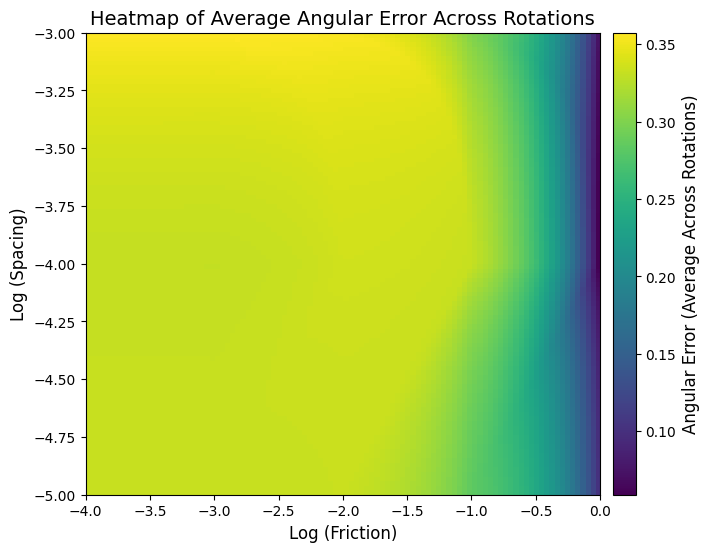

In [30]:
# Data (Replace `results` with your actual data)
data = results

# Extract components
friction = np.array([entry[0] for entry in data])
spacing = np.array([entry[1] for entry in data])
rotations = np.array([entry[2] for entry in data])
error = np.array([entry[3] for entry in data])

# Aggregate maximum error for each (friction, spacing)
# Group errors by unique (friction, spacing) pairs
unique_pairs = list(set(zip(friction, spacing)))
max_error_per_pair = {
    pair: avg(error[(friction == pair[0]) & (spacing == pair[1])])
    for pair in unique_pairs
}

# Prepare data for interpolation
friction_unique = np.array([pair[0] for pair in unique_pairs])
spacing_unique = np.array([pair[1] for pair in unique_pairs])
error_max = np.array([max_error_per_pair[pair] for pair in unique_pairs])

# Set up the grid for heatmap
friction_grid = np.logspace(np.log10(min(friction)), np.log10(max(friction)), 100)
spacing_grid = np.logspace(np.log10(min(spacing)), np.log10(max(spacing)), 100)
grid_x, grid_y = np.meshgrid(friction_grid, spacing_grid)

# Interpolate the maximum error for the grid
grid_z = griddata(
    (friction_unique, spacing_unique), error_max,
    (grid_x, grid_y), method='linear'
)

# Create the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(
    grid_z,
    extent=[
        np.log10(min(friction)), np.log10(max(friction)),
        np.log10(min(spacing)), np.log10(max(spacing))
    ],
    origin='lower',
    aspect='auto',
    cmap='viridis'
)

# Add title and axis labels
ax.set_title('Heatmap of Average Angular Error Across Rotations', fontsize=14)
ax.set_xlabel('Log (Friction)', fontsize=12)
ax.set_ylabel('Log (Spacing)', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Angular Error (Average Across Rotations)', fontsize=12)

# Save the figure
# plt.savefig('maximum_error_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()